In [33]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import cmocean
import netCDF4
from netCDF4 import Dataset
import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import glidertools as gt
import os
import xarray as xa

In [34]:
#import glider data

filenames = '/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p402*.nc'

# pull out only science variables
names = [
    'ctd_depth',
    'ctd_time',
    'salinity',
    'temperature',
    'wlbb2fl_sig695nm_adjusted',
    'wlbb2fl_sig700nm_adjusted',
    'aanderaa4330_dissolved_oxygen',
    'aa4330_airsat',
    'satPAR_PARuV', 
    'satPAR_time'
]

ds_dict = gt.load.seaglider_basestation_netCDFs(
    filenames, names,
    return_merged=False,
    keep_global_attrs=False,
)

print(ds_dict)


DIMENSION: ctd_data_point
{ctd_time, longitude, salinity, ctd_depth, temperature, latitude}


100%|██████████| 2583/2583 [00:12<00:00, 213.33it/s]


/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020001.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020002.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020003.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020004.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020005.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020006.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020007.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020008.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020009.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020010.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Da

100%|██████████| 2583/2583 [00:11<00:00, 223.50it/s]


/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020001.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020002.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020003.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020004.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020005.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020006.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020007.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020008.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020009.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020010.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Da

100%|██████████| 2583/2583 [00:11<00:00, 225.66it/s]


/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020001.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020002.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020003.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020004.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020005.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020006.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020007.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020008.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020009.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020010.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Da

100%|██████████| 2583/2583 [00:10<00:00, 238.76it/s]


/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020001.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020002.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020003.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020004.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020005.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020006.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020007.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020008.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020009.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Data/OCULUS_Glider/netcdf_withpar/p4020010.nc was skipped
/Users/anjalishah/Desktop/EcoFOCI2024/Da

In [21]:
#merge glider data into dataframe

#ctd data
df1=ds_dict['ctd_data_point'].to_dataframe()
df1.set_index(df1['ctd_time_dt64'],inplace=True)
df1.drop(labels='ctd_time_dt64',axis=1,inplace=True)
df1

# fluorometer data
df2=ds_dict['wlbb2fl_data_point'].to_dataframe()
df2.set_index(df2['wlbb2fl_time_dt64'],inplace=True)
df2.drop(labels='wlbb2fl_time_dt64',axis=1,inplace=True)

merged = df1.join(df2, sort=True, how="outer", rsuffix="_drop")

# oxygen data
df1=merged
df3=ds_dict['aa4330_data_point'].to_dataframe()
df3.set_index(df3['aanderaa4330_results_time_dt64'],inplace=True)
df3.drop(labels='aanderaa4330_results_time_dt64',axis=1,inplace=True)

merged = df1.join(df3, sort=True, how="outer", rsuffix="_drop")

#par data 
df1=merged
df4=ds_dict['scicon_satpar_satPAR_data_point'].to_dataframe()
df4.set_index(df4['satPAR_time_dt64'],inplace=True)
df4.drop(labels='satPAR_time_dt64',axis=1,inplace=True)

df = df1.join(df4, sort=True, how="outer", rsuffix="_drop")

In [22]:
#take only downcasts
down = df[df.dives - (df.dives // 1) == 0]
up = df[df.dives - (df.dives // 1) != 0]

In [23]:
#define surface, bottom, maximum, and average matrices
subgridded_surface = down[down['ctd_depth']<10].groupby('dives').mean() #take values at surface (top 3m) wihin the same dive, and average them
subgridded_bottom = down[down['ctd_depth']>60].groupby('dives').mean()
subgridded_max = down.groupby('dives').max()
subgridded_min = down.groupby('dives').min()
subgridded_avg = down.groupby('dives').mean()

In [6]:
print(len(subgridded_surface))
print(len(subgridded_bottom))
print(len(subgridded_max))
print(len(subgridded_min))
print(len(subgridded_avg))

2408
2409
2411
2411
2411


In [7]:
#create feature matrix for clusters: average temp, average salinity, average oxygen, average chlorophyll, delta_t, delta_s, delta_o, max_chlor, depth_max_chlor

#get average values 
subgridded_cluster_features = pd.DataFrame()

#input avg values
subgridded_cluster_features['avg_temperature'] = subgridded_avg['temperature']
subgridded_cluster_features['avg_sal'] = subgridded_avg['salinity']
subgridded_cluster_features['avg_oxy'] = subgridded_avg['aa4330_airsat']
subgridded_cluster_features['avg_chlor'] = subgridded_avg['wlbb2fl_sig695nm_adjusted']

#get delta values 
subgridded_cluster_features['delta_temperature'] = subgridded_surface['temperature']-subgridded_bottom['temperature']
subgridded_cluster_features['delta_salinity'] = subgridded_surface['salinity']-subgridded_bottom['salinity']
subgridded_cluster_features['delta_oxy'] = subgridded_surface['aa4330_airsat']-subgridded_bottom['aa4330_airsat']
subgridded_cluster_features['max_chlor'] = subgridded_max['wlbb2fl_sig695nm_adjusted'] #input chlorophyll max parameter into delta matrix (instead of surf-bottom)

In [8]:
#find depth of max chlorophyll --> this did not end up working out, but could be a useful predictor in the future
idx = down.groupby('dives')['wlbb2fl_sig695nm_adjusted'].transform('max') == down['wlbb2fl_sig695nm_adjusted'] #transform function takes the groupby values and appends them to the original dataframe
max_chlor_idx = pd.DataFrame(down[idx][['ctd_depth', 'dives']])
max_chlor_idx = max_chlor_idx.set_index('dives')
max_chlor_idx = max_chlor_idx[~max_chlor_idx.index.duplicated(keep='first')]

subgridded_cluster_features['depth_max_chlor'] = max_chlor_idx['ctd_depth']
len(subgridded_cluster_features)

#add latitude and longitude 
subgridded_cluster_features['latitude'] = subgridded_avg['latitude']

subgridded_cluster_features['longitude'] = subgridded_avg['longitude']

In [9]:
subgridded_cluster_features = subgridded_cluster_features.dropna() #drops about 70 dives!

feature_matrix = subgridded_cluster_features[['delta_temperature', 'delta_salinity', 'delta_oxy', 'max_chlor']]

#normalize data (necessary for K-means)
scaler = MinMaxScaler()
feature_matrix = scaler.fit_transform(feature_matrix)

In [10]:
#load CTD data -- ended up being insufficient data to 'predict' clusters on, but could be useful in the future 

#load a range of files
filenames = '/Users/anjalishah/Desktop/EcoFOCI2024/Data/CTDDY2306/CTD_preliminary_data/' #cast data
file_range = range(1, 89)
file_pattern = [os.path.join(filenames, f"DY2306c{i:03d}_ctd.nc") for i in file_range]

#store all files in a dictionary
net_cdf_files = {}
for i, name in enumerate(file_pattern):
    net_cdf_files[name[-10:-7]] = (xa.open_dataset(file_pattern[i]))

id = []
lat = []
lon = []
delta_temperature = []
delta_salinity = []
delta_oxy = []
max_chlor = []
#figure out ice proximate CTD casts --> export locations! 
for i, name in enumerate(net_cdf_files):
    id.append(name)
    lat.append(net_cdf_files[name].latitude.values[0])
    lon.append(net_cdf_files[name].longitude.values[0])
    length = len(net_cdf_files[name].depth.values)
    delta_temperature.append((net_cdf_files[name].temperature_ch1.values[0, 0, 0, :][0]) - (net_cdf_files[name].temperature_ch1.values[0, 0, 0, :][length-1]))
    delta_salinity.append((net_cdf_files[name].salinity_ch1.values[0, 0, 0, :][0]) - (net_cdf_files[name].salinity_ch1.values[0, 0, 0, :][length-1]))
    delta_oxy.append((net_cdf_files[name].oxy_percentsat_ch1.values[0, 0, 0, :][0]) - (net_cdf_files[name].oxy_percentsat_ch1.values[0, 0, 0, :][length-1]))
    max_chlor.append((net_cdf_files[name].chlor_fluorescence.values[0, 0, 0, :]).max())
ctd_data = pd.DataFrame(columns = ['id', 'lat', 'lon', 'delta_temperature', 'delta_salinity', 'delta_oxy', 'max_chlor'])

ctd_data['id'] = id 
ctd_data['lat'] = lat 
ctd_data['lon'] = lon 
ctd_data['delta_temperature'] = delta_temperature
ctd_data['delta_salinity'] = delta_salinity 
ctd_data['delta_oxy'] = delta_oxy
ctd_data['max_chlor'] = max_chlor
ctd_data = ctd_data.dropna()

In [12]:
CTD_predict_features = ctd_data[['delta_temperature', 'delta_salinity', 'delta_oxy', 'max_chlor']]

#normalize data
scaler = MinMaxScaler() 
CTD_predict_features = scaler.fit_transform(CTD_predict_features)

In [13]:
def renumber_clusters(cluster_labels, thresh=1):
  outlier_thresh = 2

  cluster_labels[cluster_labels<0] = -1  # all negative cluster numbers set to -1
  cluster_idx, cluster_count = np.unique(cluster_labels[cluster_labels != -1], return_counts=True)

  new_cluster_idx = -1*np.ones_like(cluster_idx)
  new_cluster_labels = -1*np.ones_like(cluster_labels)
  n_clusters = 0

  for idx, count in zip(cluster_idx, cluster_count):
    if count > thresh: # cluster
      new_cluster_idx[cluster_idx==idx] = n_clusters
      new_cluster_labels[cluster_labels==idx] = n_clusters
      n_clusters += 1
    else: # outliter
      new_cluster_idx[cluster_idx==idx] = -1
      new_cluster_labels[cluster_labels==idx] = -1

  return new_cluster_labels

In [14]:
### Define function to plot distribution of silhouette scores for KMeans clustering
def get_cmap(N,cmap=cmocean.cm.haline):
    #Returns a function that maps each index in 0, 1, ... N-1 to a distinct RGB color. The default colormap is gist_rainbow.'
    
    from matplotlib import cm, colors

    # Set the min and max value expected from the inputs
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)

    # Map a scalar value to the colormap
    scalar_map = cm.ScalarMappable(norm=color_norm, cmap=cmap)

    # Return a list of colors
    clist = scalar_map.to_rgba(np.arange(N))
    return clist
    
def plot_silhouette_kmeans(XX, nclust_list):

    '''
    Function to compare the silhouette score distributions for KMeans clustering
    with different numbers of input clusters.
    '''

    # Make one subplot per cluster size
    fig, ax = plt.subplots(1,len(nclust_list),sharex=True, tight_layout=True)
    fig.set_size_inches((10,12),forward=True)

    # Loop over cluster sizes
    for nn, n_clusters in enumerate(nclust_list):

        # Select axis on which to plot
        ax1 = ax[nn]

        # Get KMeans clusters and labels for this size.
        clustKM = KMeans(n_clusters=n_clusters, init='k-means++',
                         n_init=15, random_state=2023).fit(XX)
        cluster_labels = clustKM.labels_

        # Get the average silhouette scores across samples and print
        silhouette_avg = silhouette_score(XX, cluster_labels)
        print("For n_clusters = {:2d}, the average silhouette_score is: {:.4f}.".format(
            n_clusters,silhouette_avg))

        # Compute the silhouette scores for each sample
        silhouette_values = silhouette_samples(XX, cluster_labels)

        # # Get the average silhouette scores across samples and print
        silhouette_avg = silhouette_score(XX, cluster_labels)
        # print("For n_clusters = {:2d}, the average silhouette_score is: {:.4f}.".format(
        #     n_clusters,silhouette_avg))

        # # Compute the silhouette scores for each sample
        # silhouette_values = silhouette_samples(XX, cluster_labels)

        # Get different color for different cluster
        cmaps = get_cmap(n_clusters)

        # Loop over clusters and plot the distribution of cluster sizes
        y_lower = 0
        for ii in range(n_clusters):

            # Sort the silhouette values for cluster ii
            svals_ii = np.sort(silhouette_values[cluster_labels == ii])

            # Select color for cluster ii
            color = cmaps[ii]

            # Plot the distribution of silhouette scores
            ninclust_ii = svals_ii.shape[0]
            y_upper = y_lower + ninclust_ii
            ax1.fill_betweenx(np.arange(y_lower, y_upper),0, svals_ii,
                              facecolor=color, edgecolor=color, alpha=1.0)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(0.9, y_lower + 0.5 * ninclust_ii, str(ii),fontsize=13)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # this allows a bit of padding

        # Label the plot and axes
        ax1.set_title('Silhouette Scores for ' + 'n_clusters = {:}'.format(n_clusters),fontsize=15)
        

        # Plot a vertical line for the silhouette average
        ax1.axvline(x=silhouette_avg, color="k", linestyle="-",
                    label='mean={:.4f}'.format(silhouette_avg))
        ax1.legend(loc='upper right',fontsize=14,framealpha=1.0)

        # Format the x and y limits and axes
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xlim((-0.2,1.0))
        ax1.set_ylim((0,1.1*y_upper))
        ax1.tick_params(labelsize=14)
        ax1.set_ylabel("Cluster label",fontsize=20)
        ax1.set_xlabel("Silhouette coefficient values",fontsize=20)
   
    # Show all

    fig.supxlabel("Silhouette coefficient values",fontsize=20)
    fig.supylabel("Cluster label",fontsize=20)
    fig.suptitle("Silhouette Scores for n-clusters", fontsize=20)
    plt.show()

In [15]:
#compute silhouette scores 
def compute_silhouette_scores(test_nclusters): 
    test_silhouettes = np.zeros(test_nclusters.size)
    test_inertia = np.zeros(test_nclusters.size)
    for i, n_clusters in enumerate(test_nclusters):
    
        # Get KMeans clusters and labels for this size
        clustKM = KMeans(n_clusters=n_clusters, init='k-means++',
                         n_init=10, random_state=2023).fit(feature_matrix)
        cluster_labels = clustKM.labels_
    
        # Get the average silhouette scores across samples and print
        silhouette_avg = silhouette_score(feature_matrix, cluster_labels)
        test_silhouettes[i] = silhouette_avg
        test_inertia[i] =  clustKM.fit(feature_matrix).inertia_
    return test_silhouettes, test_inertia

In [17]:
# reduce dimensions 

# ndim = 5
# pca = PCA(n_components=ndim).fit(feature_matrix)

# var_ratio = pca.explained_variance_ratio_

# plt.figure(figsize=(10,5))
# plt.plot(np.arange(1,ndim+1), var_ratio, marker='.')
# plt.xlabel('number of PCs')
# plt.ylabel('cumulative explained variance ratio')
# plt.show()

# print('cumulative explained variance: ', np.round(var_ratio[0:10],4))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


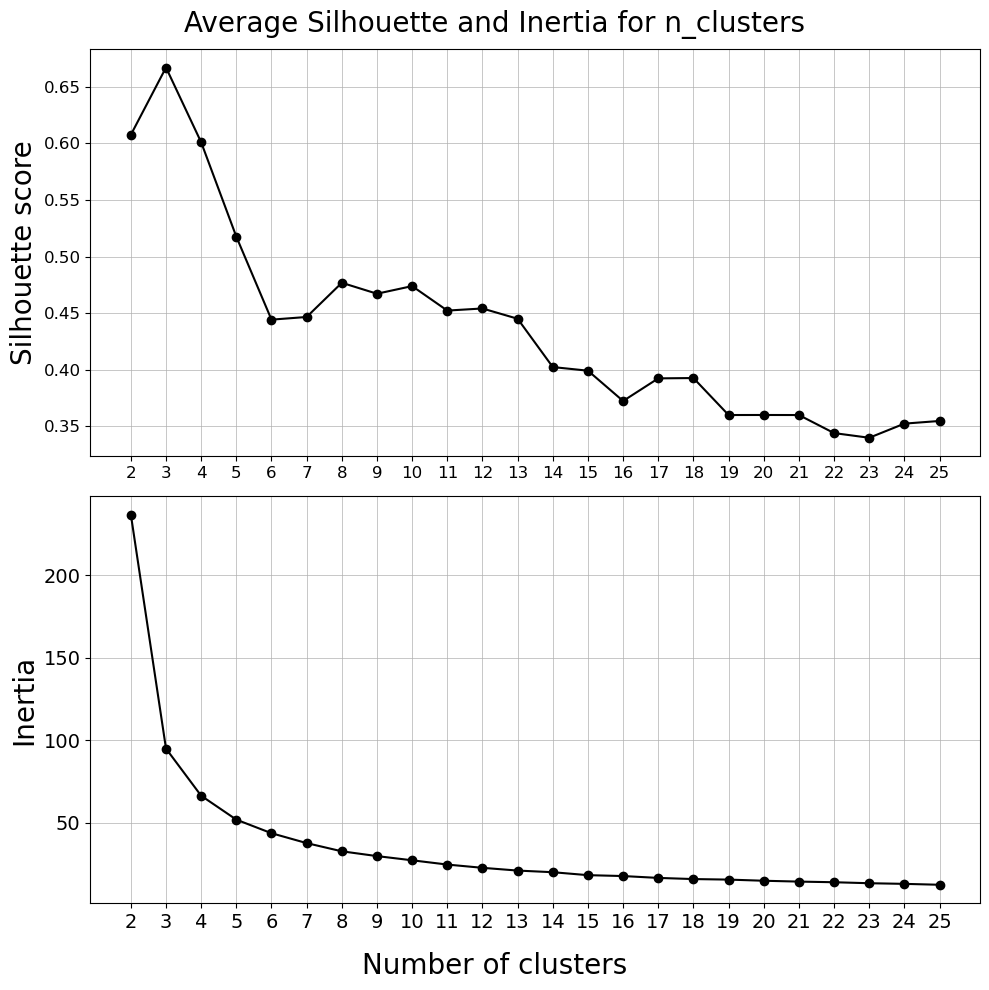

In [18]:
# compute inertia and silhouette scores with above functions

test_nclusters = np.arange(2,26)
test_silhouettes, test_inertia = compute_silhouette_scores(test_nclusters)

fig, ax = plt.subplots(2,1, figsize=(10,10), tight_layout=True)

# plot silhouette scores
ax[0].plot(test_nclusters,test_silhouettes,'-o',c='k')

# format axis
ax[0].set_ylabel('Silhouette score',fontsize=20)
ax[0].tick_params(labelsize=12)
ax[0].set_xticks(test_nclusters)
ax[0].grid(lw=0.5)

ax[1].plot(test_nclusters,test_inertia,'-o',c='k')

# format inertia axes
ax[1].set_ylabel('Inertia',fontsize=20)
ax[1].tick_params(labelsize=14)
ax[1].set_xticks(test_nclusters)
ax[1].grid(lw=0.5)

fig.suptitle('Average Silhouette and Inertia for n_clusters', fontsize=20)
fig.supxlabel('Number of clusters',fontsize=20)
plt.show()
plt.close()

For n_clusters =  3, the average silhouette_score is: 0.6670.
For n_clusters =  4, the average silhouette_score is: 0.6010.


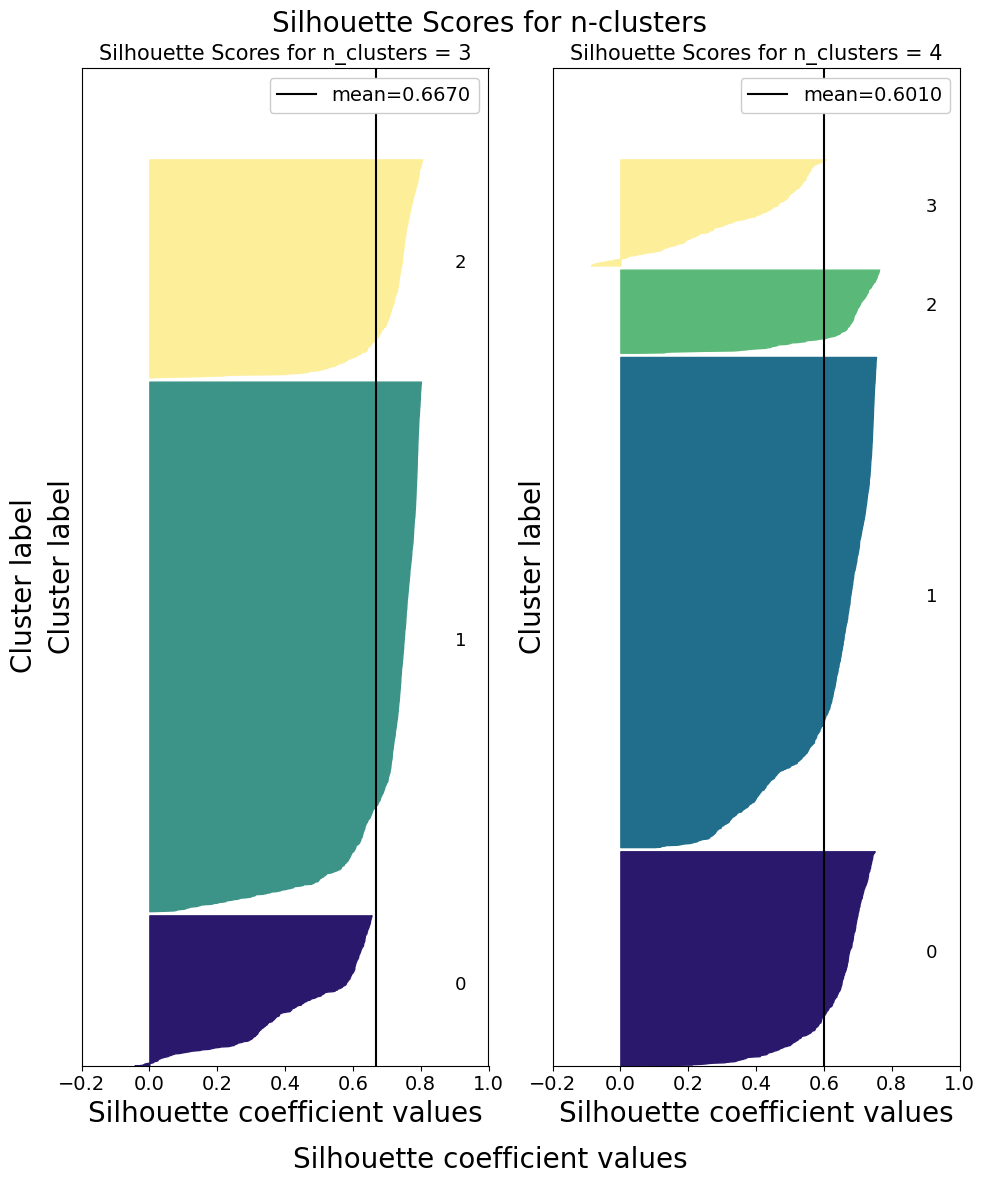

In [35]:
plot_silhouette_kmeans(feature_matrix, [3,4])

In [25]:
#run k-means --> fit model with n=3
n_clusters = 3
clustKM = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=2023)
clustKM.fit(feature_matrix) #fit Kmeans to feature matrix
cluster_id_kmeans = clustKM.labels_ #extract cluster labels
print('number of clusters:',len(np.unique(cluster_id_kmeans))) # this should be the same as the n_clusters we put in

subgridded_cluster_features['kmeans_cluster_id'] = cluster_id_kmeans #add labels to dataframe

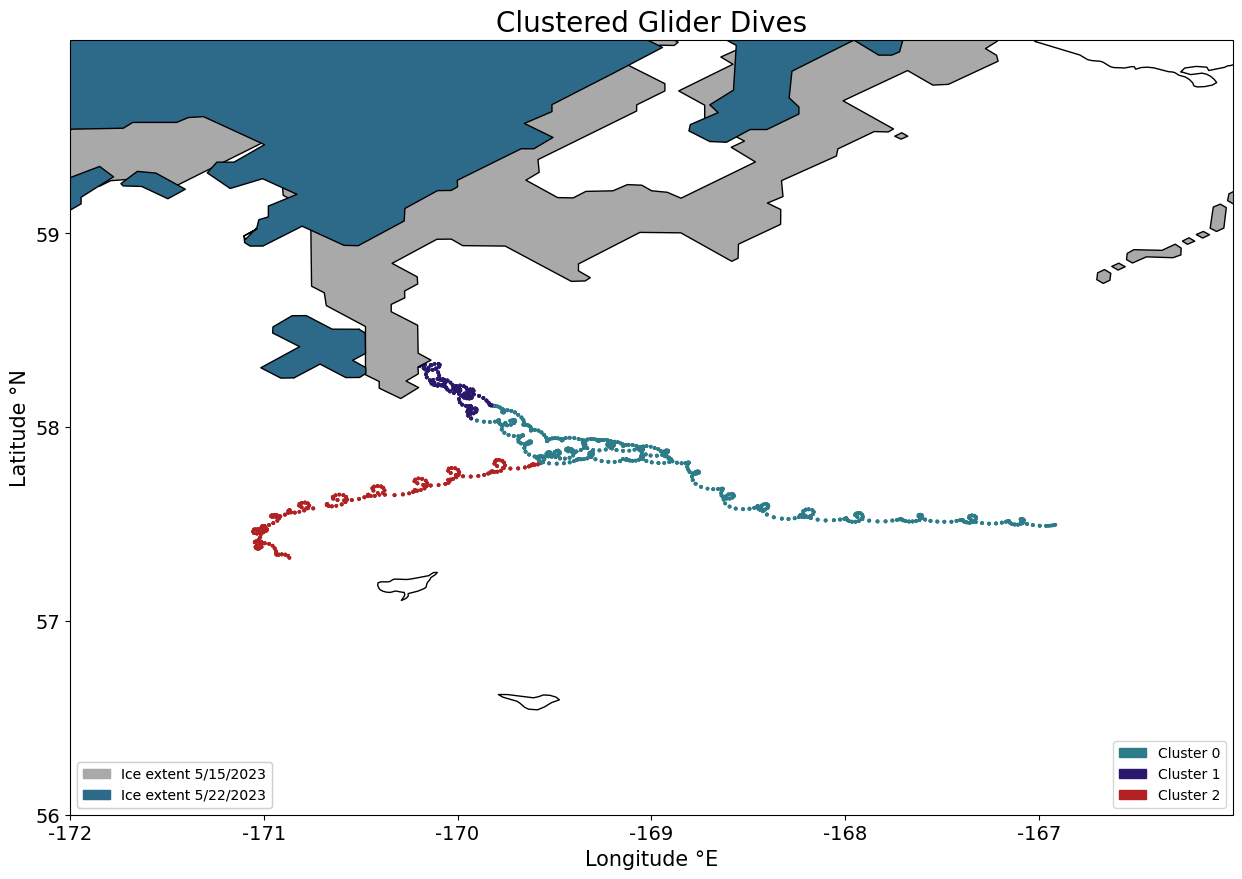

In [32]:
fig, ax = plt.subplots(subplot_kw = {'projection': ccrs.PlateCarree()}, figsize=(15,15))
ax.coastlines()
ax.set_extent([-172, -166, 56, 60], crs=ccrs.PlateCarree())

ax.set_xticks(np.arange(-172, -166, 1), crs=ccrs.PlateCarree())
ax.set_xticklabels(np.arange(-172, -166, 1), fontsize=14)
ax.set_xlabel('Longitude °E', fontsize=15)
ax.set_ylabel('Latitude °N', fontsize=15)
ax.set_yticks(np.arange(56, 60, 1), crs=ccrs.PlateCarree())
ax.set_yticklabels(np.arange(56, 60, 1), fontsize=14)

#plot ice reader
ice_5_14 = Reader('/Users/anjalishah/Desktop/EcoFOCI2024/ice_514_presentation.shp')
ice_5_22 = Reader('/Users/anjalishah/Desktop/EcoFOCI2024/ice_5_22_presentation.shp')

shape_feature_14 = ShapelyFeature(ice_5_14.geometries(),
                               ccrs.PlateCarree())

shape_feature_22 = ShapelyFeature(ice_5_22.geometries(),
                               ccrs.PlateCarree())

ax.add_feature(shape_feature_14, edgecolor='black', facecolor = 'darkgrey') #eac16e
ax.add_feature(shape_feature_22, edgecolor='black', facecolor='#2d6989') #e6c5e1

lat_glider = subgridded_cluster_features["latitude"]
lon_glider = subgridded_cluster_features["longitude"]
cluster_id = subgridded_cluster_features["kmeans_cluster_id"]

plot = ax.scatter(lon_glider, lat_glider, s=3, c=cluster_id , cmap=ListedColormap(['#2a186c', '#2d7c89','firebrick']), transform=ccrs.PlateCarree())
ax.set_title('Clustered Glider Dives', fontsize=20)

regime_legend = ax.legend(handles=patches, loc='lower right')
ice_legend = ax.legend(handles=patches_2, loc='lower left')
ax.add_artist(regime_legend)
ax.add_artist(ice_legend)

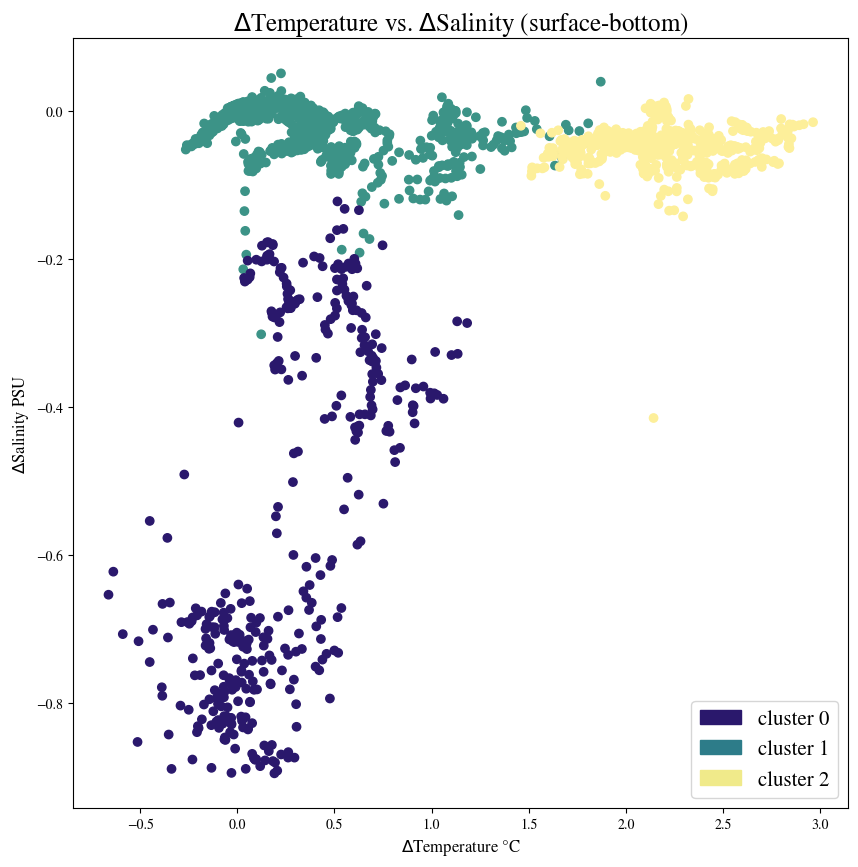

In [427]:
#plot clusters in feature space
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(subgridded_cluster_features['delta_temperature'], subgridded_cluster_features['delta_salinity'], c=cluster_id_kmeans, cmap=cmocean.cm.haline)
ax.set_xlabel(r'$\Delta$Temperature °C', fontsize=12)
ax.set_ylabel(r'$\Delta$Salinity PSU', fontsize=12)
ax.set_title(r'$\Delta$Temperature vs. $\Delta$Salinity (surface-bottom)', fontsize=18)
ax.legend(handles=patches, loc='lower right', fontsize=15)

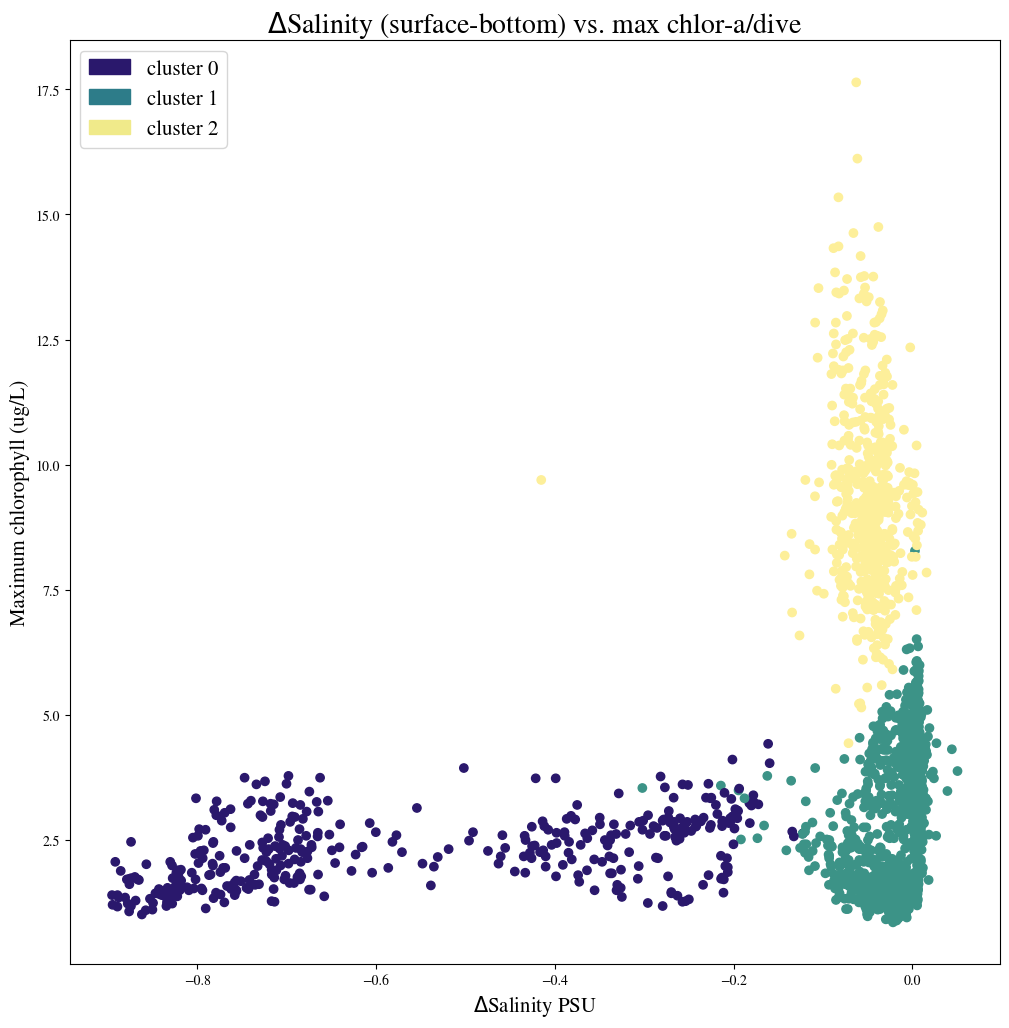

In [428]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(subgridded_cluster_features['delta_salinity'], subgridded_cluster_features['max_chlor'], c=cluster_id, cmap=cmocean.cm.haline)
ax.set_xlabel(r'$\Delta$Salinity PSU', fontsize=15)
ax.set_ylabel('Maximum chlorophyll (ug/L)', fontsize=15)
ax.set_title(r'$\Delta$Salinity (surface-bottom) vs. max chlor-a/dive', fontsize=20)
ax.legend(handles=patches, loc='upper left', fontsize=15)

In [32]:
#attempt to predict with CTD clusters
CTD_clusters = clustKM.predict(CTD_predict_features)
ctd_data['ctd_cluster_id'] = CTD_clusters

KeyError: 'ctd_cluster_id'

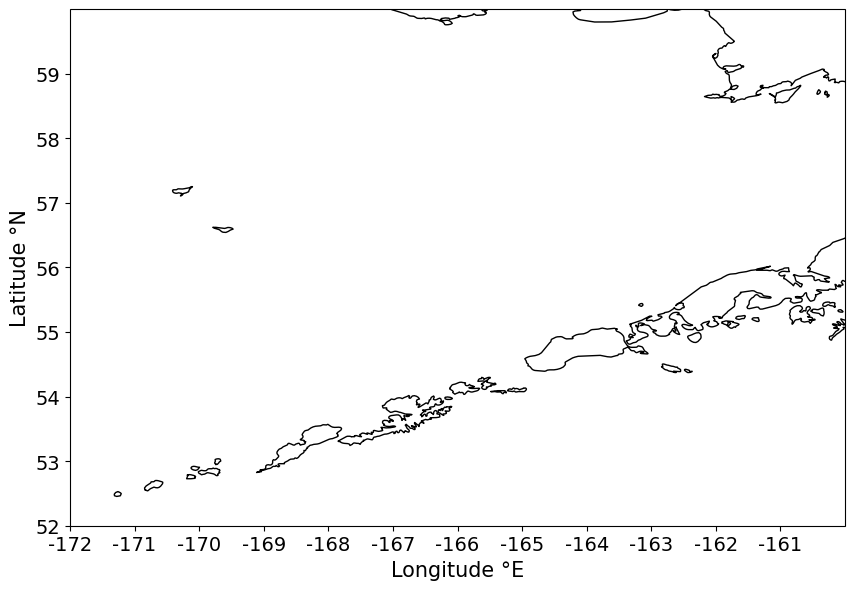

In [27]:
#plot CTD predicted clusters
fig, ax = plt.subplots(subplot_kw = {'projection': ccrs.PlateCarree()}, figsize=(10,10))
ax.coastlines()
ax.set_extent([-172, -160, 52, 60], crs=ccrs.PlateCarree())

ax.set_xticks(np.arange(-172, -160, 1), crs=ccrs.PlateCarree())
ax.set_xticklabels(np.arange(-172, -160, 1), fontsize=14)
ax.set_xlabel('Longitude °E', fontsize=15)
ax.set_ylabel('Latitude °N', fontsize=15)
ax.set_yticks(np.arange(52, 60, 1), crs=ccrs.PlateCarree())
ax.set_yticklabels(np.arange(52, 60, 1), fontsize=14)


lat_glider = subgridded_cluster_features["latitude"]
lon_glider = subgridded_cluster_features["longitude"]
glider_cluster_id = subgridded_cluster_features["kmeans_cluster_id"]

lat_ctds = ctd_data['lat']
lon_ctds = ctd_data['lon']
ctd_cluster_id = ctd_data['ctd_cluster_id']

ax.scatter(lon_glider, lat_glider, s=3, c=glider_cluster_id , cmap=cmocean.cm.haline, transform=ccrs.PlateCarree())
ax.scatter(lon_ctds, lat_ctds, s=20, c=ctd_cluster_id, cmap=cmocean.cm.haline, marker='^', transform=ccrs.PlateCarree())

ax.set_title('Clustered Glider and CTD Casts', fontsize=20)
ax.legend(handles=patches, loc='upper right', fontsize=15)



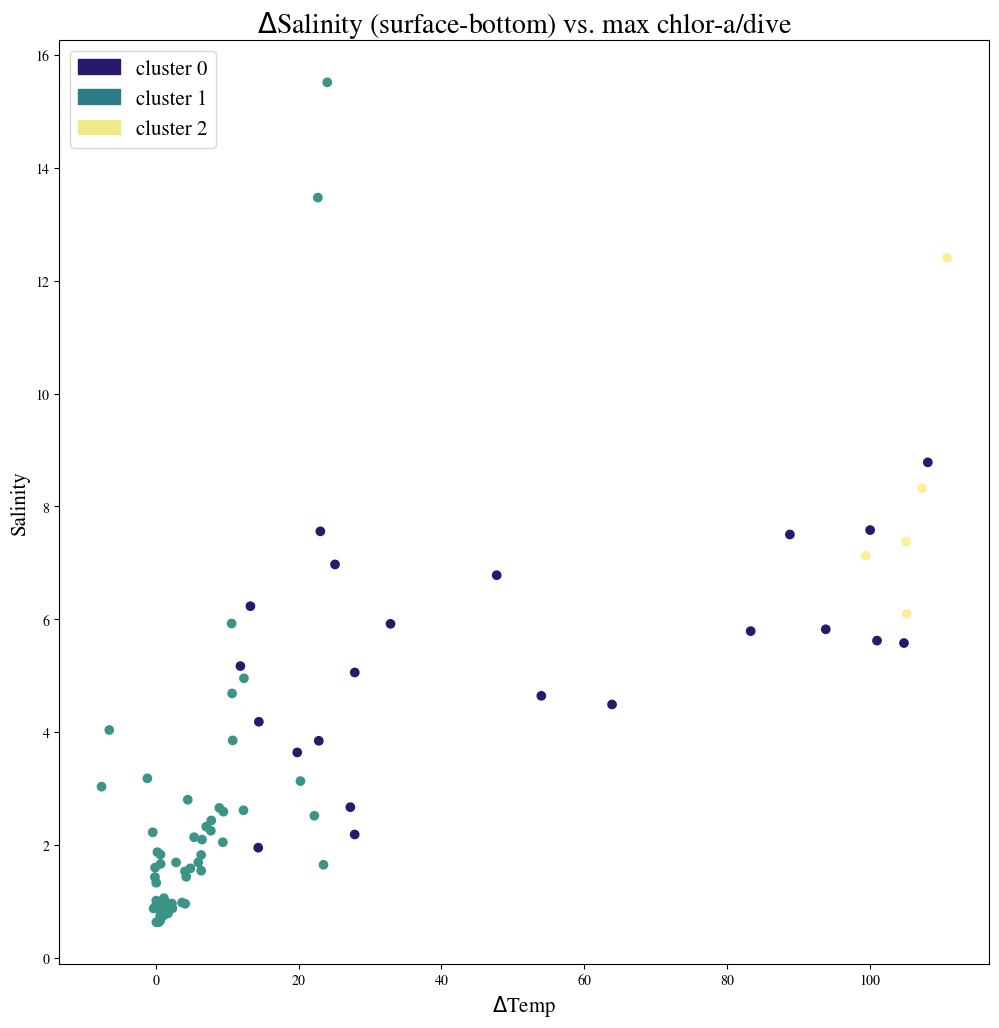

In [438]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(ctd_data['delta_oxy'], ctd_data['max_chlor'], c=ctd_data['ctd_cluster_id'], cmap=cmocean.cm.haline)
ax.set_xlabel(r'$\Delta$Temp', fontsize=15)
ax.set_ylabel('Salinity', fontsize=15)
ax.set_title(r'$\Delta$Salinity (surface-bottom) vs. max chlor-a/dive', fontsize=20)
ax.legend(handles=patches, loc='upper left', fontsize=15)

In [155]:
#trying aggl clustering
cluster_id_AC = AgglomerativeClustering(n_clusters=3, linkage='average').fit(feature_matrix)
subgridded_cluster_features['cluster_id_AC'] = cluster_id_AC.labels_

Text(0.5, 1.0, 'Clusters')

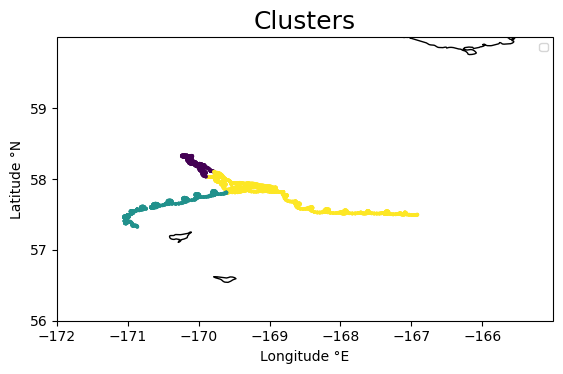

In [157]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-172, -165, 56, 60], crs=ccrs.PlateCarree())

ax.set_xticks(np.arange(-172, -165, 1), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude °E')
ax.set_ylabel('Latitude °N')
ax.set_yticks(np.arange(56, 60, 1), crs=ccrs.PlateCarree())

ax.legend(['OCULUS 05_23', 'Ice_proximate_path'], fontsize=7.5)
ax.set_title('Locations of Assets')

lat_glider = subgridded_cluster_features["latitude"]
lon_glider = subgridded_cluster_features["longitude"]
cluster_id = subgridded_cluster_features["cluster_id_AC"]
plot = ax.scatter(lon_glider, lat_glider, s=3, c=cluster_id , transform=ccrs.PlateCarree())
ax.set_title('Clusters', fontsize=18)

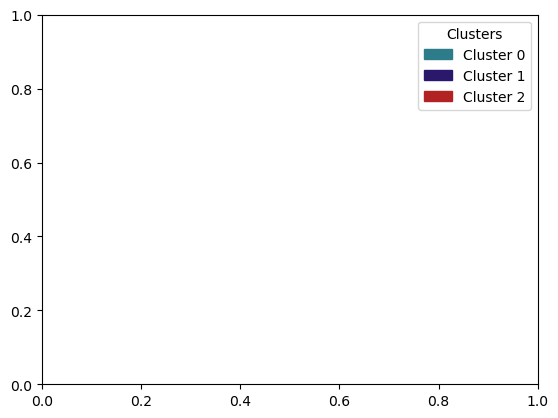

In [31]:
from matplotlib.patches import Patch

# Define the discrete colors and their labels
colors = ['#2d7c89', '#2a186c','firebrick']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Create the patches for each color
patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Create a figure and axis
fig, ax = plt.subplots()

# Add the legend to the plot
ax.legend(handles=patches, loc='upper right', title='Clusters')

# Display the plot (the plot itself is empty, but it has the legend)
plt.show()


colors_2 = ['darkgrey', '#2d6989']
labels_2 = ['Ice extent 5/15/2023', 'Ice extent 5/22/2023']

patches_2 = [Patch(color=color, label=label) for color, label in zip(colors_2, labels_2)]
ax.legend(handles=patches_2, loc='lower left')

#colormaps --> create new one 
cmap = plt.get_cmap(cmocean.cm.haline)  # You can choose any colormap

# Number of discrete colors you want
num_colors = 30

# Get the discrete colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Convert the colors to hex codes
hex_colors = [matplotlib.colors.to_hex(color) for color in colors]

print(hex_colors)

For n_clusters =  2, the average silhouette_score is: 0.6692.
For n_clusters =  3, the average silhouette_score is: 0.4670.
For n_clusters =  4, the average silhouette_score is: 0.4762.
For n_clusters =  5, the average silhouette_score is: 0.4529.


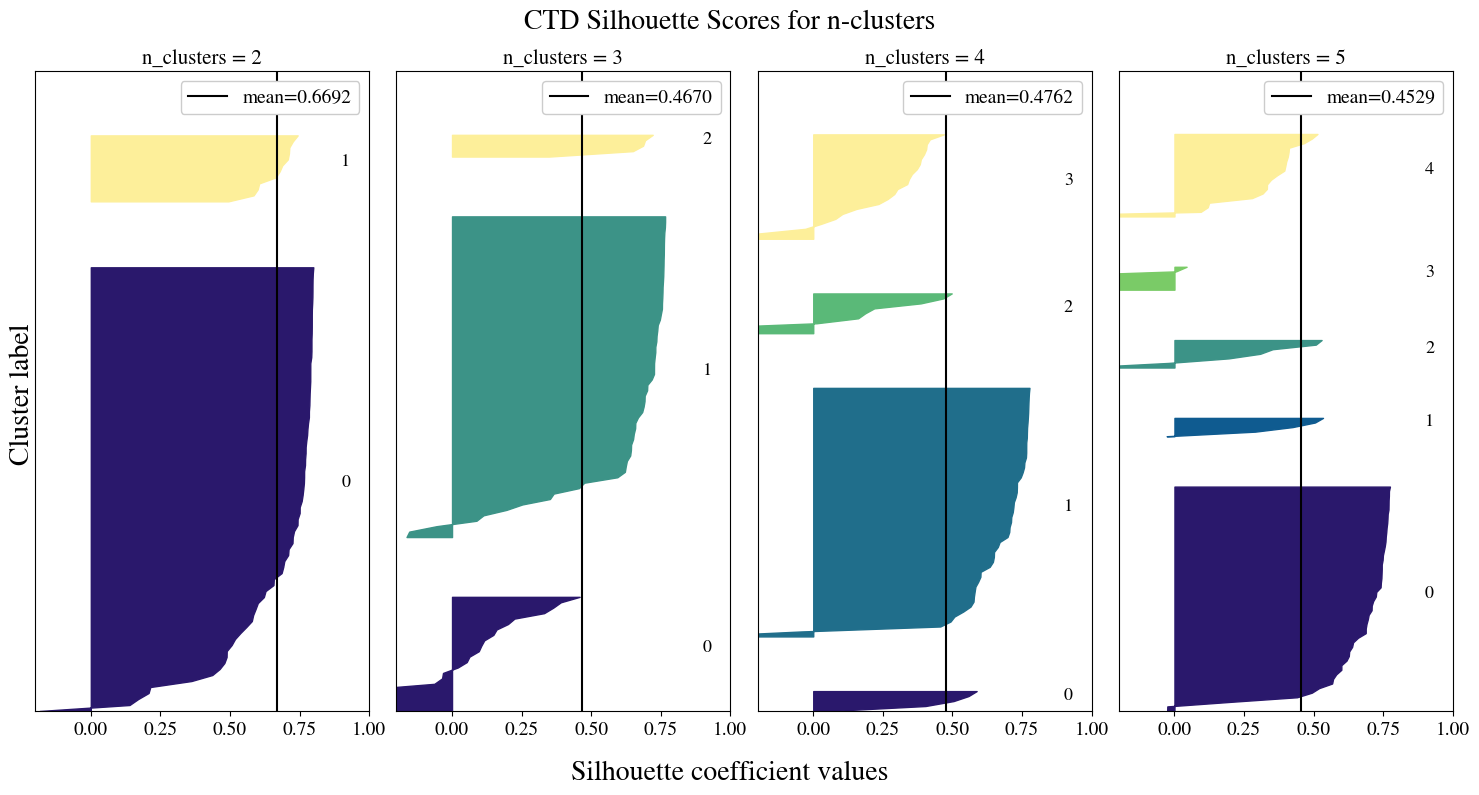

In [28]:
plot_silhouette_kmeans(feature_matrix, [2, 3, 4, 5])